# Unsupervised Learning (Customer Spending)

Dataset : https://www.kaggle.com/datasets/goyaladi/customer-spending-dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 
df = pd.read_csv('/Users/lorencialo/Downloads/COURSES/UNI YEAR 2/UNI YEAR 3/CW ML/customer_data.csv') 
df.info()
print("Missing values per column:\n", df.isnull().sum())

df 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB
Missing values per column:
 name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64


,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [2]:
# Data Preprocessing (Encoding and Scaling)

education_order = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df['education'] = df['education'].map(education_order)

for col in ['gender', 'education', 'country']:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

columns = ['age', 'income', 'purchase_frequency', 'spending', 'gender', 'education', 'country']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns])

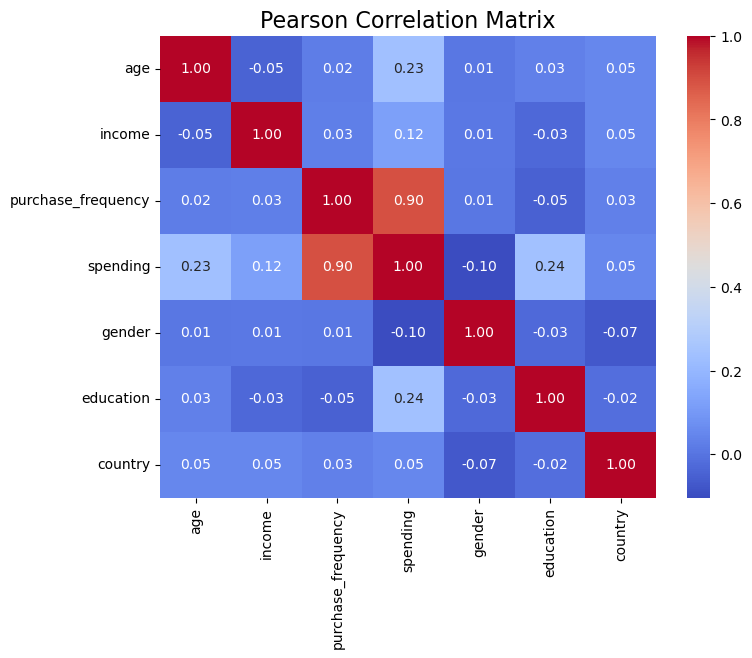

In [3]:
# Calculate Pearson correlation for numerical columns
correlation_matrix = df[columns].corr(method='pearson')

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.show()


  Principal Component  Standard Deviation  Proportion of Variance  \
0                 PC1            1.404793                0.281639   
1                 PC2            1.045039                0.155859   
2                 PC3            1.036029                0.153183   
3                 PC4            1.001010                0.143003   
4                 PC5            0.983988                0.138181   
5                 PC6            0.933753                0.124432   
6                 PC7            0.161096                0.003704   

   Cumulative Variance  
0             0.281639  
1             0.437498  
2             0.590681  
3             0.733684  
4             0.871864  
5             0.996296  
6             1.000000  


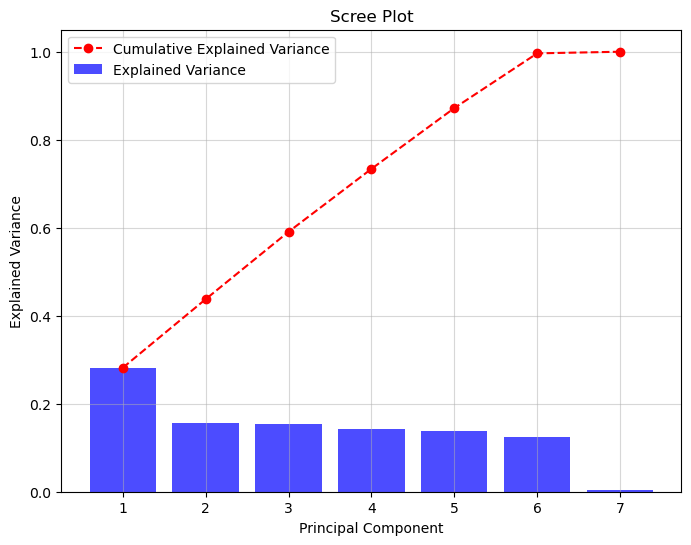

In [4]:
# Perform PCA on the scaled data
pca = PCA(n_components=len(columns)) 
pca_data_full = pca.fit_transform(df_scaled)

# Compute PCA statistics
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

# Create a summary table
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Standard Deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print PCA summary table
print(pca_summary)

# Scree Plot
plt.figure(figsize=(8, 6))
components = range(1, len(columns) + 1)  # Component numbers
plt.bar(components, explained_variance, alpha=0.7, color='b', label='Explained Variance')
plt.plot(components, cumulative_variance, marker='o', color='r', linestyle='--', label='Cumulative Explained Variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(components)  
plt.legend()
plt.grid(alpha=0.5)
plt.show()


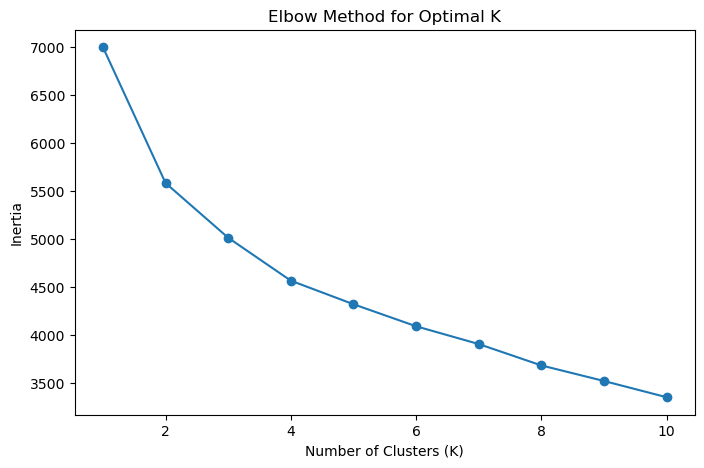

In [5]:
# Define range for K
k_values = range(1, 11)  # Testing K from 1 to 10
inertia = []

# Run K-Means for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


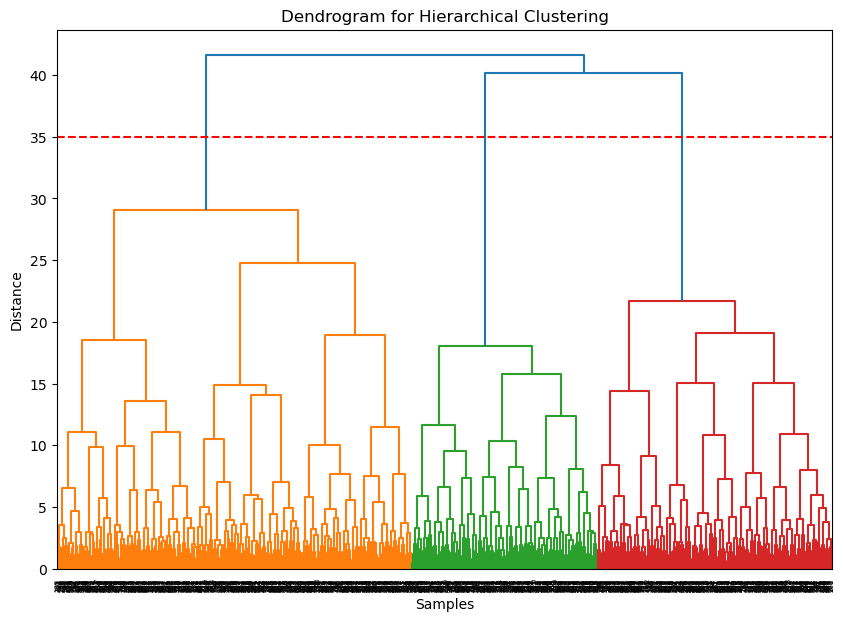

In [6]:
import scipy.cluster.hierarchy as sch

# Generate the linkage matrix
dendrogram_data = sch.linkage(df_scaled, method='ward')  # 'ward' minimizes the variance of merged clusters

# Create the Dendrogram plot
plt.figure(figsize=(10, 7))
sch.dendrogram(dendrogram_data)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=35, color='r', linestyle='--')  # Set an appropriate threshold
plt.show()



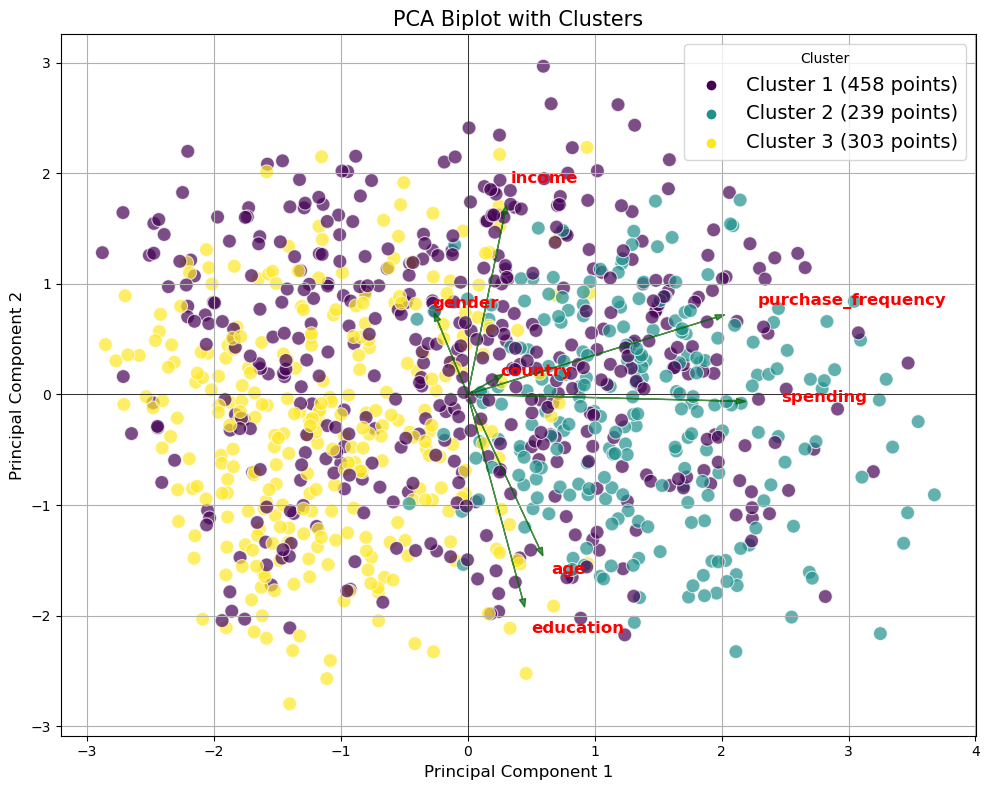


Cluster Sizes:
1    458
3    303
2    239
Name: cluster, dtype: int64


In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Add the principal components to the dataframe
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Hierarchical clustering (for example, 3 clusters)
dendrogram_data = linkage(df_scaled, method='ward')
cluster_labels = fcluster(dendrogram_data, 3, criterion='maxclust')

# Add cluster labels to the dataframe
pc_df['cluster'] = cluster_labels

# Create the scatter plot with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pc_df, palette='viridis', s=100, alpha=0.7, edgecolor='w')

# Overlay the biplot with feature vectors
for i, feature in enumerate(columns):  # assuming columns is your feature names
    plt.arrow(0, 0, pca.components_[0, i] * 3, pca.components_[1, i] * 3, 
              color='darkgreen', alpha=0.7, head_width=0.05)
    plt.text(pca.components_[0, i] * 3.5, pca.components_[1, i] * 3.5, feature, 
             color='red', fontsize=12, fontweight='bold')

# Labels and Title
plt.title('PCA Biplot with Clusters', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Get cluster sizes
cluster_counts = pc_df['cluster'].value_counts().sort_index()

# Create legend labels with counts
legend_labels = [f'Cluster {c} ({cluster_counts[c]} points)' for c in cluster_counts.index]

# Create custom legend
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Cluster', loc='upper right',fontsize=14)

# Grid, legend, and axes lines
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the cluster sizes
print("\nCluster Sizes:")
print(pc_df['cluster'].value_counts())



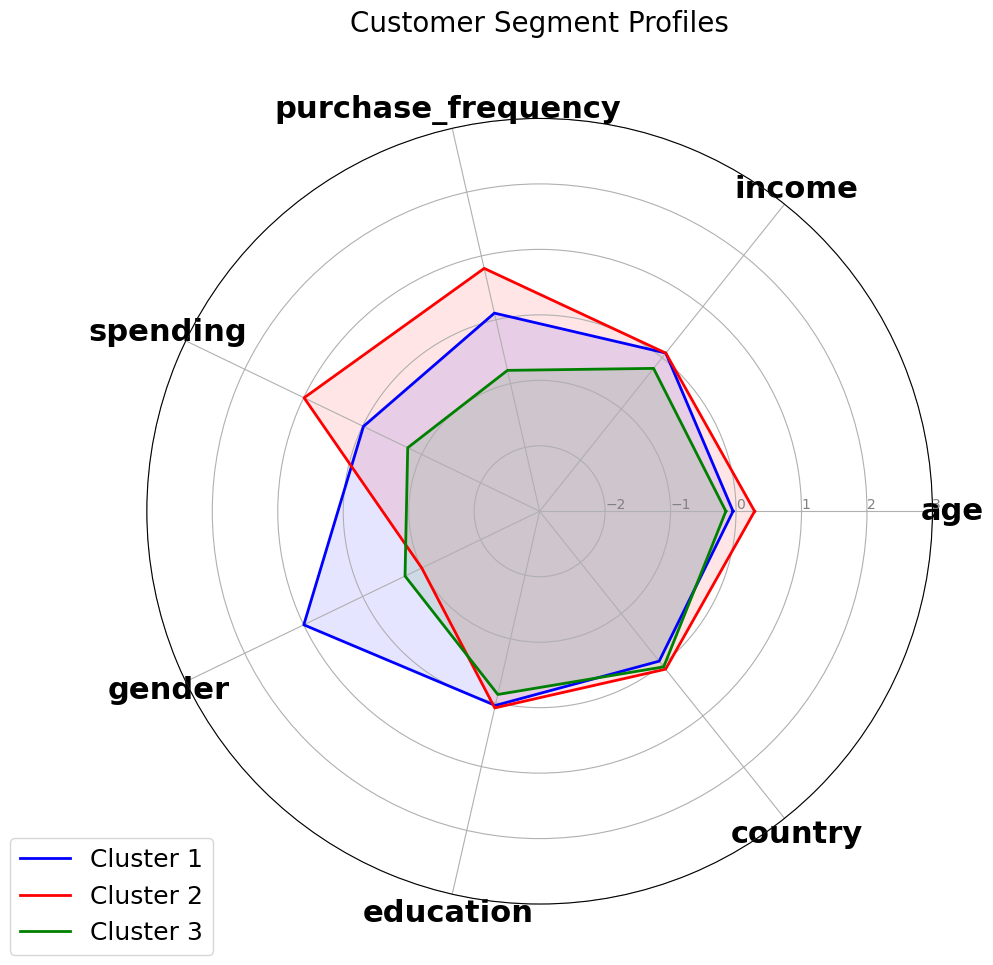


Cluster Descriptions:

Cluster 1:
Top distinguishing features: income (61392.67), spending (9541.64), country (113.44)
Lowest features: purchase_frequency (0.58), gender (1.00), education (1.53)
Interpretation: This segment represents customers with high income, spending but low purchase_frequency, gender.

Cluster 2:
Top distinguishing features: income (61377.90), spending (15058.63), country (124.39)
Lowest features: gender (0.00), purchase_frequency (0.78), education (1.58)
Interpretation: This segment represents customers with high income, spending but low gender, purchase_frequency.

Cluster 3:
Top distinguishing features: income (54424.72), spending (5426.45), country (121.18)
Lowest features: gender (0.14), purchase_frequency (0.33), education (1.34)
Interpretation: This segment represents customers with high income, spending but low gender, purchase_frequency.


In [9]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import matplotlib.patches as mpatches

df['cluster'] = pc_df['cluster']

# Function to create radar chart
def radar_chart(df, clusters, features):
    # Calculate mean values for each feature in each cluster
    cluster_means = df.groupby('cluster')[features].mean()
    
    # Number of variables
    N = len(features)
    
    # the angle of each axis in the plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], features, size=22, fontweight='bold')
    
    # Draw ylabels (removed to make it cleaner)
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=10)
    plt.ylim(-3, 3)
    
    # Plot data for each cluster with different colors
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    
    for i, cluster in enumerate(clusters):
        # Get values for this cluster
        values = cluster_means.loc[cluster].values.tolist()
        values += values[:1]  # Close the loop
        
        # Plot values
        ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors[i % len(colors)], label=f'Cluster {cluster}')
        ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=18)
    
    # Add a title
    plt.title('Customer Segment Profiles', size=20, y=1.1)
    
    return fig


# Convert scaled data to a DataFrame
df_scaled_with_clusters = pd.DataFrame(df_scaled, columns=columns)
df_scaled_with_clusters['cluster'] = df['cluster']  

# Create radar chart
features = columns  # Using all features
clusters = sorted(df['cluster'].unique())  # All clusters

radar_fig = radar_chart(df_scaled_with_clusters, clusters, features)
plt.tight_layout()
plt.savefig('customer_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()


# Create a textual description of each cluster
print("\nCluster Descriptions:")
for cluster in clusters:
    print(f"\nCluster {cluster}:")
    # Get mean values for this cluster
    cluster_means = df.groupby('cluster')[columns].mean().loc[cluster]
    
    # Find top 3 distinguishing features (highest positive values)
    top_features = cluster_means.sort_values(ascending=False).head(3)
    print(f"Top distinguishing features: {', '.join([f'{feat} ({val:.2f})' for feat, val in top_features.items()])}")
    
    # Find bottom 3 distinguishing features (lowest values)
    bottom_features = cluster_means.sort_values().head(3)
    print(f"Lowest features: {', '.join([f'{feat} ({val:.2f})' for feat, val in bottom_features.items()])}")
    
    # Provide interpretation
    print("Interpretation: This segment represents customers with " + 
          f"high {', '.join(top_features.index[:2])}" +
          f" but low {', '.join(bottom_features.index[:2])}.")

# Regression (Health Insurance)

Dataset : https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset 

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

# Load the data
df = pd.read_csv("/Users/lorencialo/Downloads/COURSES/UNI YEAR 2/UNI YEAR 3/CW ML/insurance.csv")  # Change to your actual file path

df.info()
print("Missing values per column:\n", df.isnull().sum())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


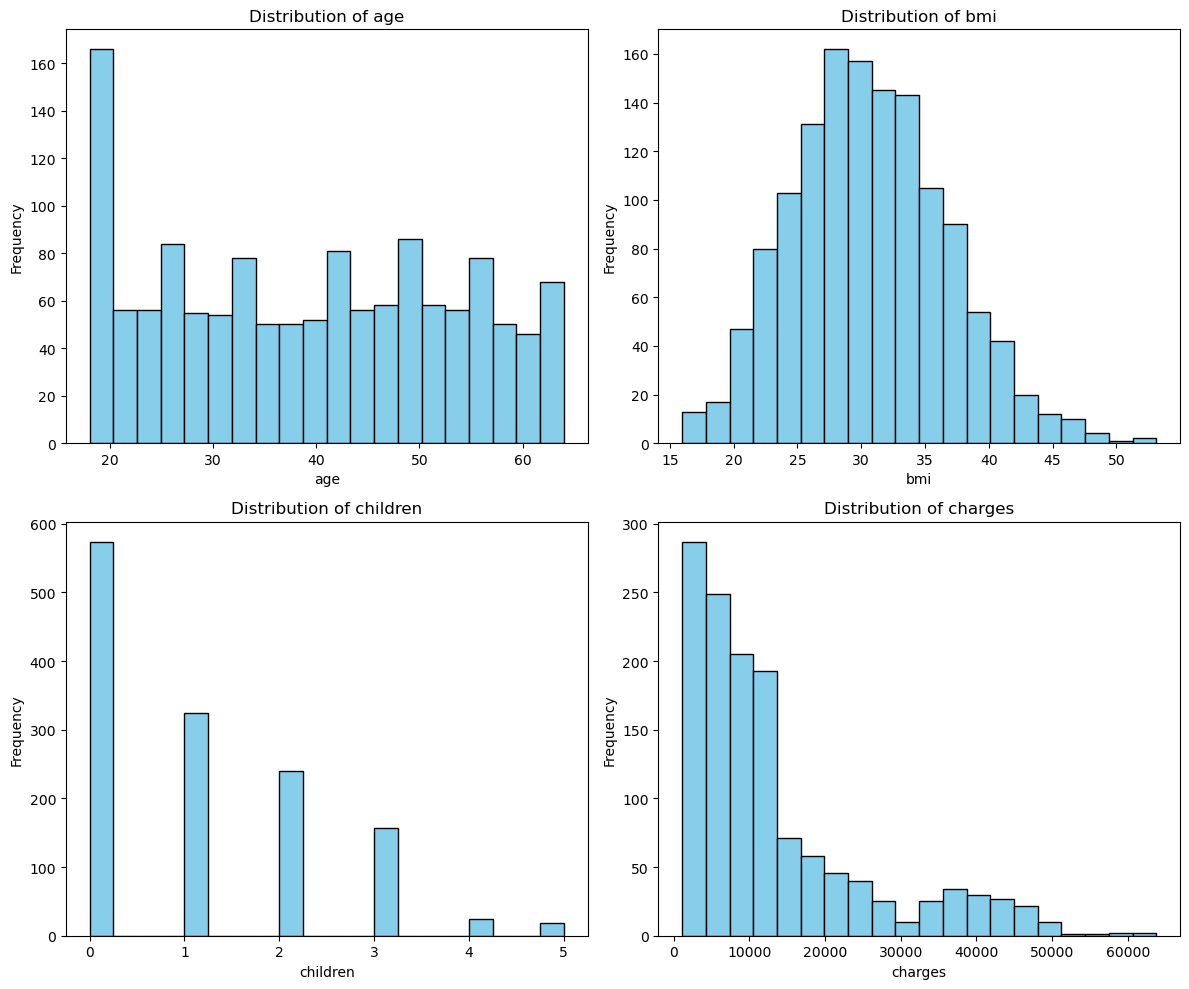

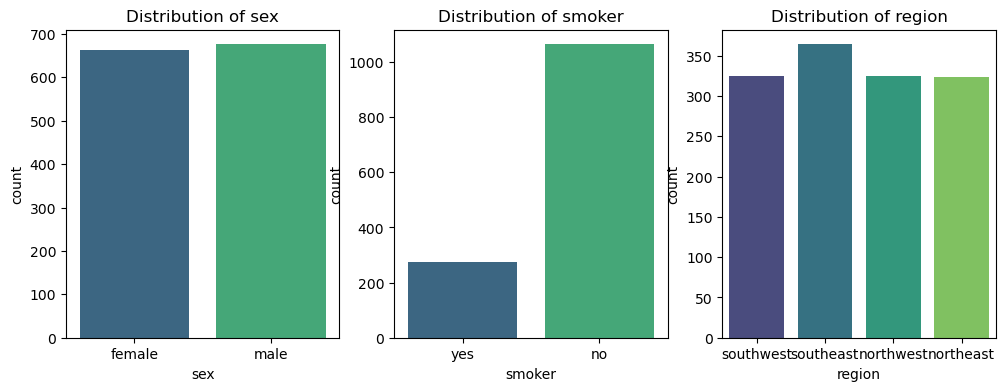

In [11]:
# List of numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Create histograms for each numerical column
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 plots
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Countplots for categorical variables
cat_cols = ['sex', 'smoker', 'region']
plt.figure(figsize=(12, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
plt.show()

Unique Values in Categorical Columns:
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']

Processed Data Sample:
        age  sex       bmi  children  smoker  region   charges
0 -1.424190    0 -0.356784         0       1       3  0.972086
1 -1.495361    1  0.643537         1       0       2 -1.137965
2 -0.783654    1  0.512320         3       0       2 -0.758821
3 -0.427801    1 -1.242076         0       0       1  1.681898
4 -0.498972    1 -0.189779         0       0       1 -0.839914


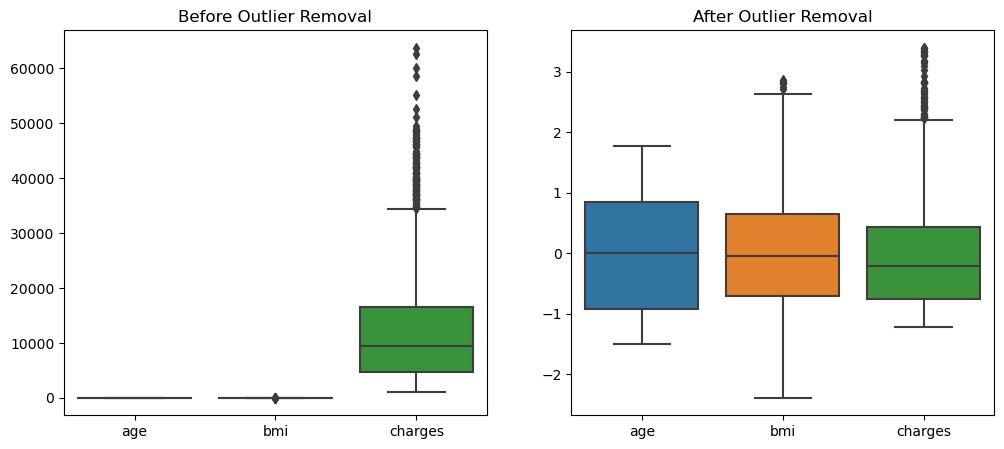

In [14]:
# Check unique values before encoding
print("Unique Values in Categorical Columns:")
for col in ['sex', 'smoker', 'region']:
    print(f"{col}: {df[col].unique()}")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'sex', 'smoker', and 'region'
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

df

# Handle Outliers (Using IQR Method)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numerical columns
for col in ['age', 'bmi', 'charges']:
    df = remove_outliers_iqr(df, col)

# Standardize Numerical Features 
scaler = StandardScaler()
df[['age', 'bmi', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'charges']])

print("\nProcessed Data Sample:")
print(df.head())

df

# Visualizing Outliers (Before & After) 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=pd.read_csv("/Users/lorencialo/Downloads/COURSES/UNI YEAR 2/UNI YEAR 3/CW ML/insurance.csv")[['age', 'bmi', 'charges']], ax=axes[0]).set_title("Before Outlier Removal")
sns.boxplot(data=df[['age', 'bmi', 'charges']], ax=axes[1]).set_title("After Outlier Removal")
plt.show()

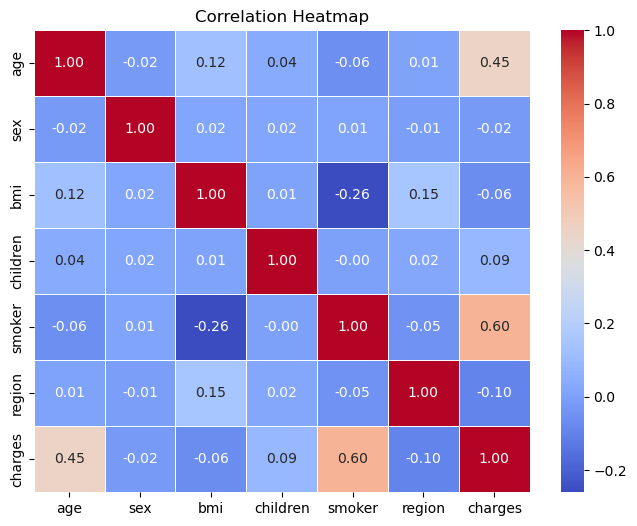

In [17]:
# Compute the correlation matrix
corr_matrix_processed = df.corr()

# Display the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_processed, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)  # Drop the target column 'charges'
y = df['charges']  # Target column

# Scale the features (Standard Scaling)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)) 

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_scaled = lr_model.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Print Output
print("\n" + "=" * 50)
print("Linear Regression Results")
print("=" * 50)
print("\nResiduals:")
print(f"    Min: {np.min(y_test_original - y_pred):.4f}")
print(f"    1Q:  {np.percentile(y_test_original - y_pred, 25):.4f}")
print(f"    Median: {np.median(y_test_original - y_pred):.4f}")
print(f"    3Q:  {np.percentile(y_test_original - y_pred, 75):.4f}")
print(f"    Max: {np.max(y_test_original - y_pred):.4f}")
print("\nCoefficients:")
for feature, coef in zip(X.columns, lr_model.coef_.flatten()):
    print(f"{feature}: {coef}")

# Calculate Mean Squared Error (MSE) R-squared (R²)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of test samples
p = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\nModel Summary:")
print(f"    Residual Standard Error: {np.sqrt(mse):.4f}")
print(f"    Multiple R-squared: {r2:.4f}")
print(f"    Adjusted R-squared: {adj_r2:.4f}")
print(f"    Mean Squared Error (MSE): {mse:.4f}")



Linear Regression Results

Residuals:
    Min: -0.8162
    1Q:  -0.2617
    Median: -0.1827
    3Q:  -0.0897
    Max: 2.9314

Coefficients:
age: 0.46797163738192876
sex: -0.011126208825915529
bmi: 0.04619273637736575
children: 0.06820806259238085
smoker: 0.6569143230782132
region: -0.06795261759363146

Model Summary:
    Residual Standard Error: 0.6206
    Multiple R-squared: 0.6327
    Adjusted R-squared: 0.6232
    Mean Squared Error (MSE): 0.3852


Shape of Residuals: (239, 1)
Shape of Predicted Values: (239, 1)


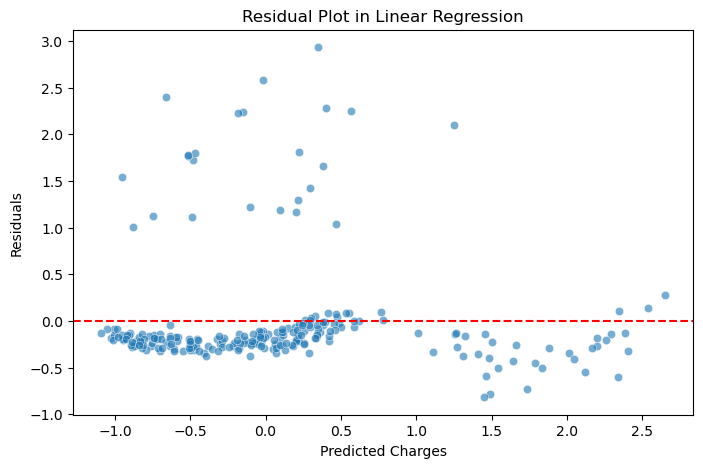

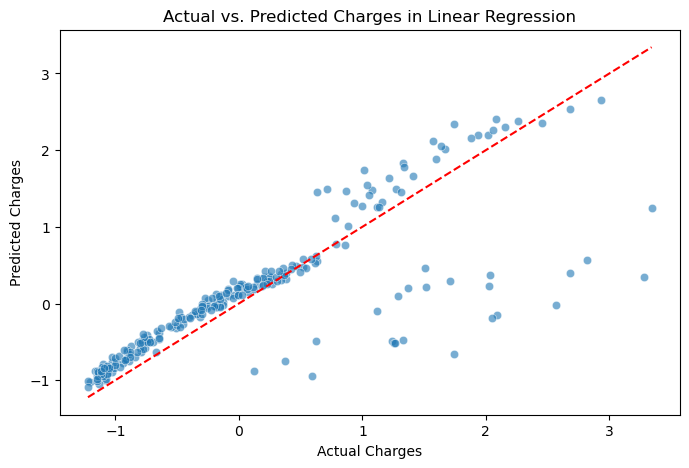

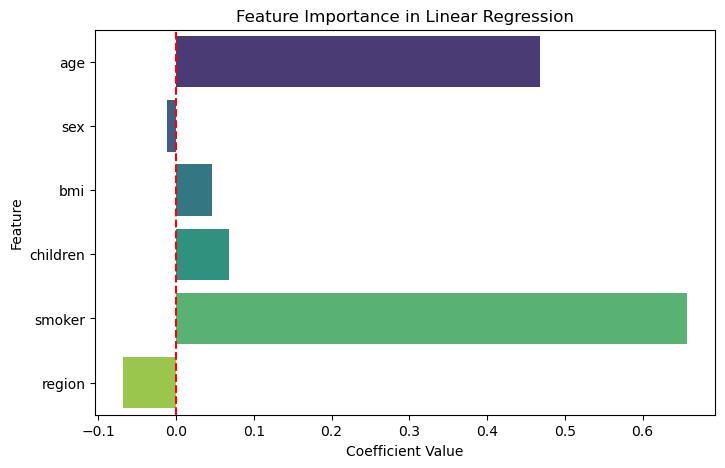

In [19]:
# Inverse-transform the predicted and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Now calculate residuals in the original scale
residuals = y_test_original - y_pred

print(f"Shape of Residuals: {residuals.shape}")
print(f"Shape of Predicted Values: {y_pred.shape}")


plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten(), alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot in Linear Regression")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_original.flatten(), y=y_pred.flatten(), alpha=0.6)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges in Linear Regression")
plt.show()

coefficients = lr_model.coef_.flatten()
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients, y=features, palette="viridis")
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()


### Random Forest 

Random Forest with 10 trees: MSE = 0.4137
Random Forest with 20 trees: MSE = 0.4082
Random Forest with 30 trees: MSE = 0.3986
Random Forest with 40 trees: MSE = 0.3952
Random Forest with 50 trees: MSE = 0.3931
Random Forest with 60 trees: MSE = 0.3908
Random Forest with 70 trees: MSE = 0.3900
Random Forest with 80 trees: MSE = 0.3881
Random Forest with 90 trees: MSE = 0.3837
Random Forest with 100 trees: MSE = 0.3841
Random Forest with 110 trees: MSE = 0.3858
Random Forest with 120 trees: MSE = 0.3859
Random Forest with 130 trees: MSE = 0.3873
Random Forest with 140 trees: MSE = 0.3875
Random Forest with 150 trees: MSE = 0.3879

 The best Random Forest model is with n_estimators = 90, achieving the lowest MSE.


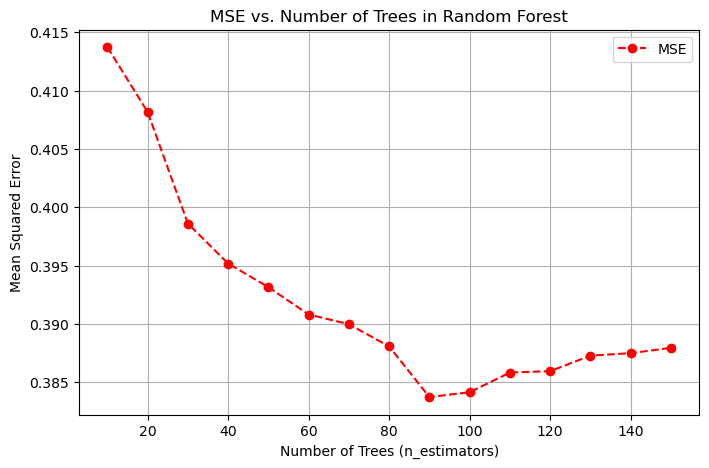

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define a range of n_estimators values to test
n_estimators_range = range(10, 160, 10)  # Steps of 10
mse_scores = []

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models with different n_estimators
for n in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Random Forest with {n} trees: MSE = {mse:.4f}")

# Find the best n_estimators
best_n_estimators = n_estimators_range[np.argmin(mse_scores)]
print(f"\n The best Random Forest model is with n_estimators = {best_n_estimators}, achieving the lowest MSE.")

# Plot the Performance
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, mse_scores, marker='o', linestyle='--', color="red", label="MSE")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Number of Trees in Random Forest")
plt.legend()
plt.grid()
plt.show()



Random Forest Regression Results

Residuals:
    Min: -1.4014
    1Q:  -0.2424
    Median: -0.0831
    3Q:  -0.0023
    Max: 2.8634

Model Summary:
    Residual Standard Error: 0.6195
    Multiple R-squared: 0.6341
    Mean Squared Error (MSE): 0.3837


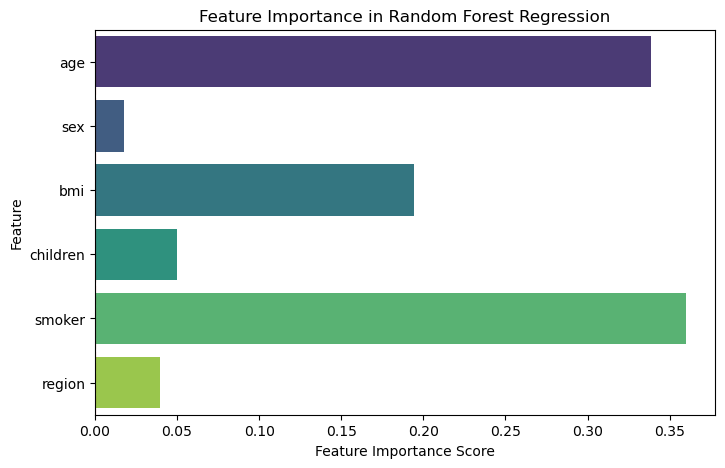


Random Forest Feature Importances:
age: 0.3384887996171358
sex: 0.017831101518602198
bmi: 0.19437965648511885
children: 0.049755797105709265
smoker: 0.35969585671400234
region: 0.03984878855943165


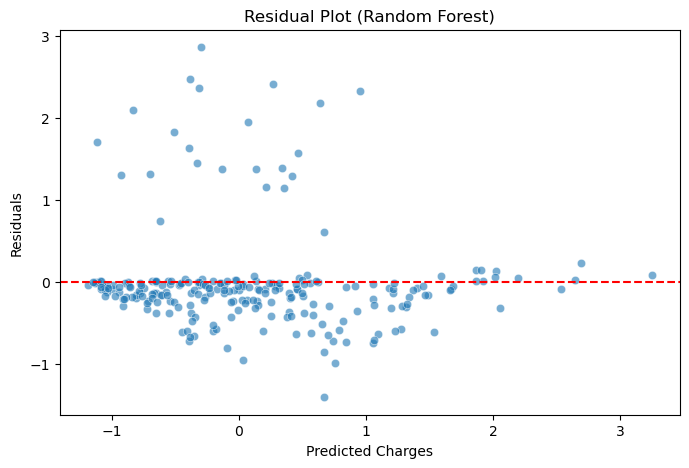

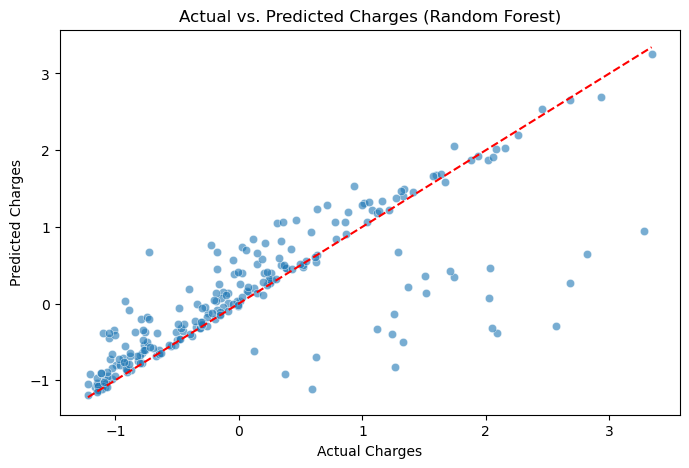

In [21]:

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and Train Random Forest Model 
rf_model = RandomForestRegressor(n_estimators=90, random_state=42)
rf_model.fit(X_train, y_train)

#  Model Evaluation
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Output 
print("\n" + "=" * 50)
print("Random Forest Regression Results")
print("=" * 50)
print("\nResiduals:")
print(f"    Min: {np.min(y_test - y_pred):.4f}")
print(f"    1Q:  {np.percentile(y_test - y_pred, 25):.4f}")
print(f"    Median: {np.median(y_test - y_pred):.4f}")
print(f"    3Q:  {np.percentile(y_test - y_pred, 75):.4f}")
print(f"    Max: {np.max(y_test - y_pred):.4f}")

print("\nModel Summary:")
print(f"    Residual Standard Error: {np.sqrt(mse):.4f}")
print(f"    Multiple R-squared: {r2:.4f}")
print(f"    Mean Squared Error (MSE): {mse:.4f}")

# Feature Importance Plot 
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Regression")
plt.show()
print("\nRandom Forest Feature Importances:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"{feature}: {importance}")

# Residual Plot 
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()

# Actual vs. Predicted Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Random Forest)")
plt.show()



### CART

Best max_depth: 4

Model Performance:
    Mean Squared Error (MSE): 0.3702
    R-squared: 0.6470


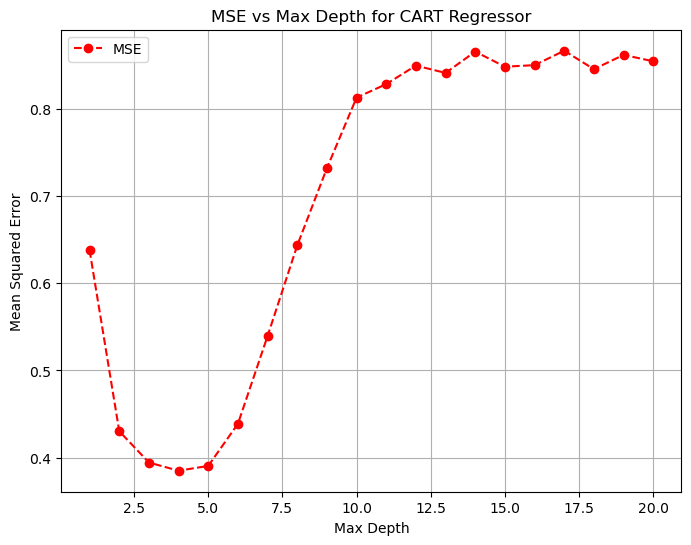

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


# Define a range of max_depth values to test
param_grid = {
    'max_depth': range(1, 21)  # Test depths from 1 to 20
}

# Initialize the model
cart_model = DecisionTreeRegressor(random_state=42)

# Perform GridSearchCV to find the best max_depth
grid_search = GridSearchCV(estimator=cart_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best max_depth and the corresponding performance
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# You can also get the best model and evaluate it
best_cart_model = grid_search.best_estimator_
y_pred = best_cart_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"    Mean Squared Error (MSE): {mse:.4f}")
print(f"    R-squared: {r2:.4f}")

# Plotting MSE vs. max_depth
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), -grid_search.cv_results_['mean_test_score'], marker='o', linestyle='--', color='red', label='MSE')
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Max Depth for CART Regressor")
plt.legend()
plt.grid(True)
plt.show()



Model Summary:
    Residual Standard Error: 0.6085
    Multiple R-squared: 0.6470
    Mean Squared Error (MSE): 0.3702


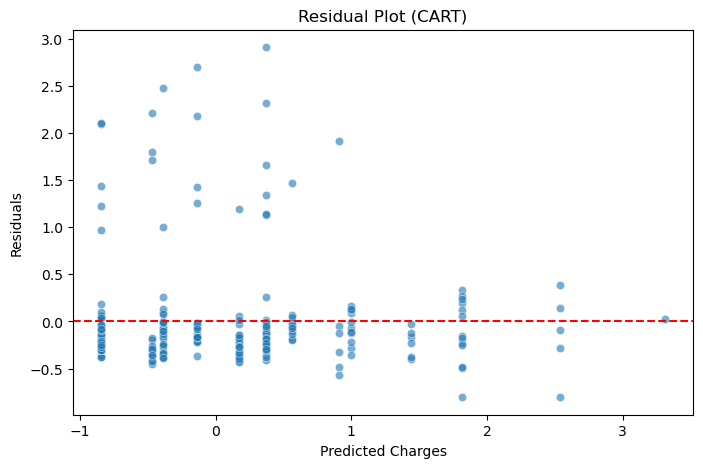

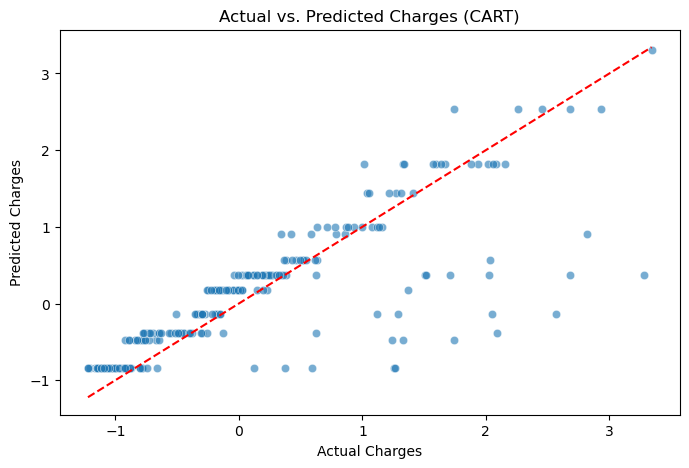

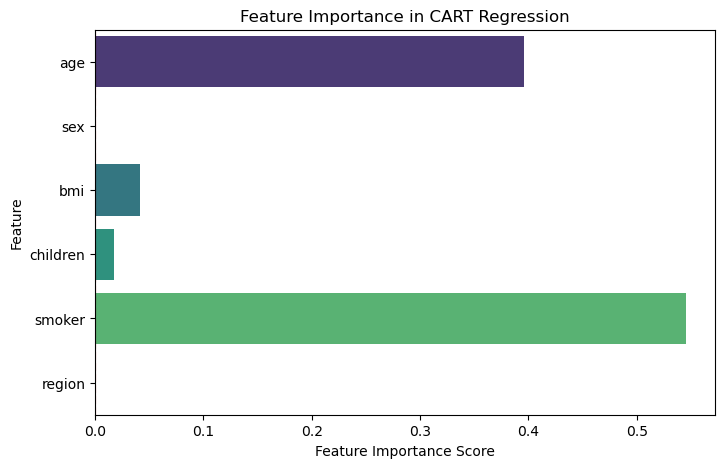


CART Feature Importances:
age: 0.39554713827602395
sex: 0.0
bmi: 0.04192961726143887
children: 0.017555038150469854
smoker: 0.5449682063120673
region: 0.0


In [23]:
# Model Evaluation after finding the best max_depth
cart_model = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

print("\nModel Summary:")
print(f"    Residual Standard Error: {np.sqrt(mse):.4f}")
print(f"    Multiple R-squared: {r2:.4f}")
print(f"    Mean Squared Error (MSE): {mse:.4f}")

# Residual Plot 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot (CART)")
plt.show()

# Actual vs. Predicted Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (CART)")
plt.show()

# Feature Importance Plot 
feature_importances = cart_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in CART Regression")
plt.show()
print("\nCART Feature Importances:")
for feature, importance in zip(X.columns, cart_model.feature_importances_):
    print(f"{feature}: {importance}")


# Classification (Obesity)

Dataset : https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction/data 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

sns.set_theme(style="whitegrid")

# Load and prepare the data
df = pd.read_csv('/Users/lorencialo/Downloads/COURSES/UNI YEAR 2/UNI YEAR 3/CW ML/Obesity prediction.csv')
df.info()
print("Missing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [25]:
# Encode categorical variables
categorical_columns = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 
                     'SCC', 'CALC', 'MTRANS', 'Obesity']

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    
df


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


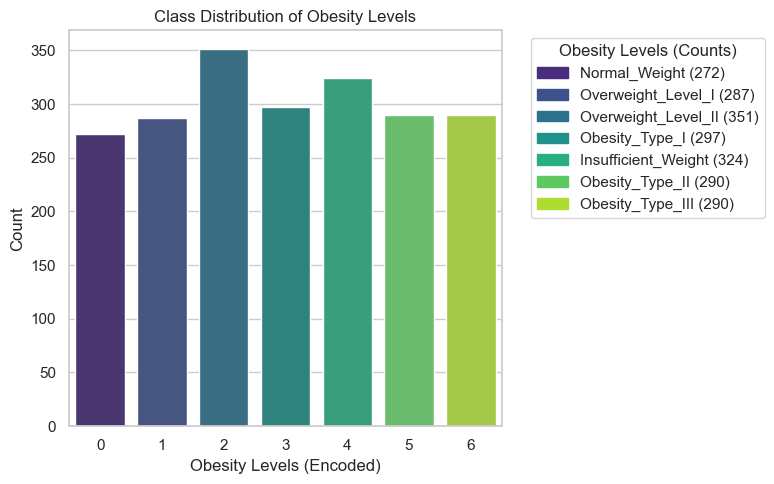

In [26]:
# Decode the 'Obesity' column back to its original labels
decoded_labels = le.inverse_transform(df['Obesity'].unique())

# Get counts for each class
counts = df['Obesity'].value_counts().sort_index()  # Sorted to match the unique classes order

plt.figure(figsize=(8, 5))
sns.countplot(x='Obesity', data=df, palette='viridis')  # Add a palette for better visuals
plt.title('Class Distribution of Obesity Levels')
plt.xlabel('Obesity Levels (Encoded)')
plt.ylabel('Count')

plt.xticks(ticks=range(len(counts)), labels=range(len(counts)))  # Labels as 0-6

# Create a custom legend
unique_classes = df['Obesity'].unique()  # Get unique encoded classes
colors = sns.color_palette('viridis', len(unique_classes))  # Generate colors for each class

# Create legend handles with decoded labels and counts
handles = [
    mpatches.Patch(
        color=colors[i], 
        label=f'{decoded_labels[i]} ({counts[i]})'
    ) for i in range(len(decoded_labels))
]

# Add the legend
plt.legend(handles=handles, title='Obesity Levels (Counts)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better display
plt.tight_layout()
plt.show()


### Random Forest

In [27]:
# Split features and target
X = df.drop('Obesity', axis=1)
y = df['Obesity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")
best_rf_model = grid_rf.best_estimator_
rf_pred_optimized = best_rf_model.predict(X_test)

print("Optimized Random Forest Results:")
print(classification_report(y_test, rf_pred_optimized))
print(f"Accuracy Score: {accuracy_score(y_test, rf_pred_optimized):.4f}")



Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.89      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423

Accuracy Score: 0.9551


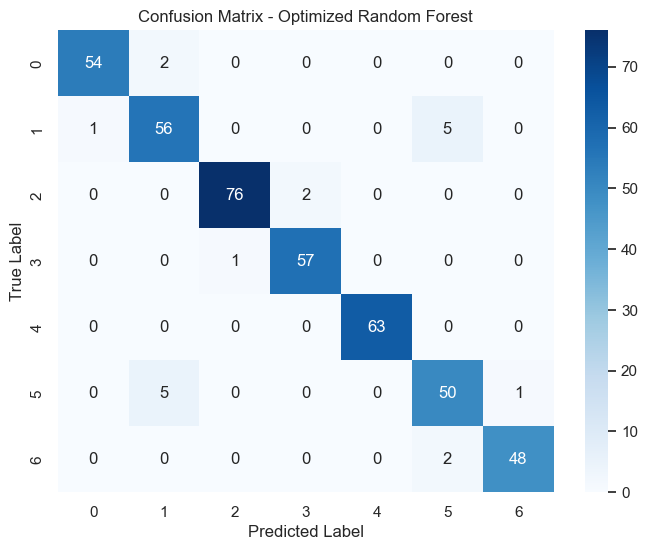

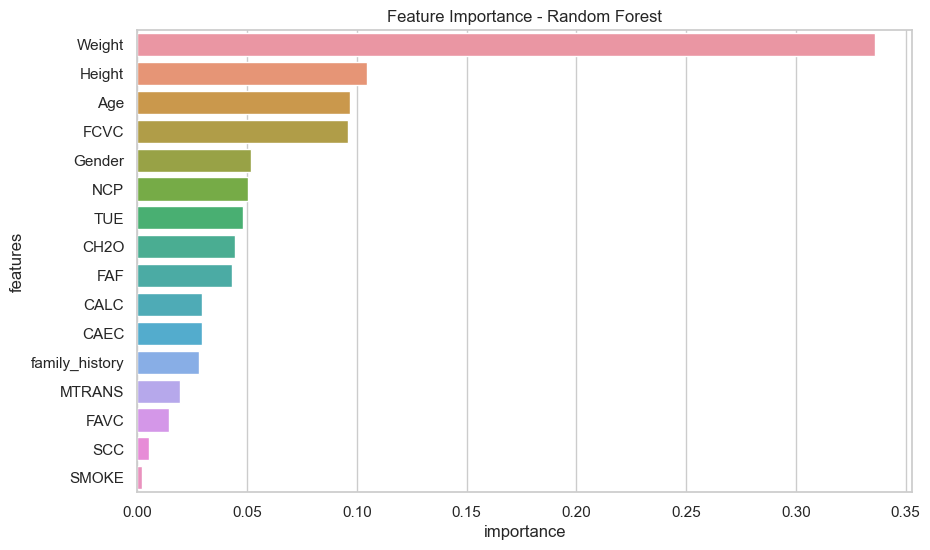

In [28]:
# Apply the best parameters
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

best_rf_model.fit(X_train, y_train)
rf_pred_best = best_rf_model.predict(X_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm_rf_best = confusion_matrix(y_test, rf_pred_best)
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importance
importances_rf = pd.DataFrame({
    'features': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances_rf, x='importance', y='features')
plt.title('Feature Importance - Random Forest')
plt.show()


### KNN

In [29]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print(f"Best Parameters for KNN: {grid_knn.best_params_}")
best_knn_model = grid_knn.best_estimator_
knn_pred_optimized = best_knn_model.predict(X_test_scaled)

print("Optimized KNN Results:")
print(classification_report(y_test, knn_pred_optimized))
print(f"Accuracy Score: {accuracy_score(y_test, knn_pred_optimized):.4f}")


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Optimized KNN Results:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        56
           1       0.80      0.66      0.73        62
           2       0.89      0.92      0.91        78
           3       0.95      0.98      0.97        58
           4       0.98      1.00      0.99        63
           5       0.88      0.77      0.82        56
           6       0.76      0.82      0.79        50

    accuracy                           0.88       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.88      0.87       423

Accuracy Score: 0.8771


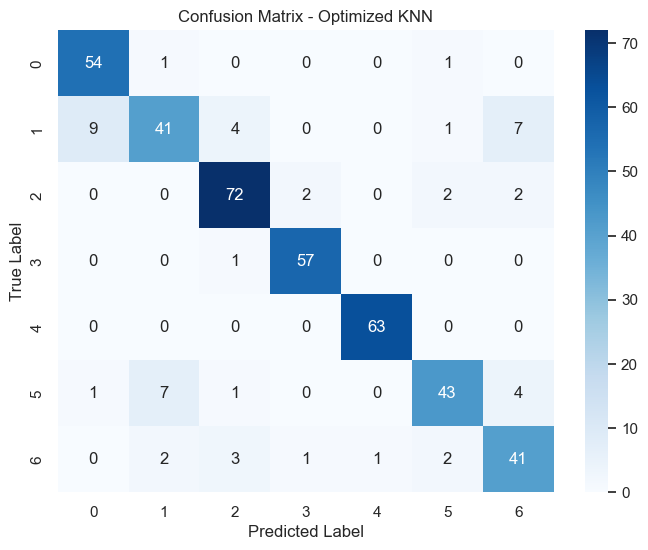

In [30]:
# Train the optimized KNN model
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test_scaled)

#Plot
cm_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Decision Tree

In [31]:
param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print(f"Best Parameters for Decision Tree: {grid_dt.best_params_}")
best_dt_model = grid_dt.best_estimator_
dt_pred_optimized = best_dt_model.predict(X_test)

print("Optimized Decision Tree Results:")
print(classification_report(y_test, dt_pred_optimized))
print(f"Accuracy Score: {accuracy_score(y_test, dt_pred_optimized):.4f}")


Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Optimized Decision Tree Results:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.90      0.87      0.89        62
           2       0.95      0.95      0.95        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.88      0.93      0.90        56
           6       0.98      0.94      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

Accuracy Score: 0.9433


In [35]:
# Data for the table
data = {
    "Class": ["Normal Weight (0)", "Overweight Level I (1)", "Overweight Level II (2)", 
              "Obesity Type I (3)", "Insufficient Weight (4)", "Obesity Type II (5)", 
              "Obesity Type III (6)", "Macro Average", "Weighted Average"],
    "Precision": [0.93, 0.90, 0.95, 0.96, 1.00, 0.88, 0.98, 0.94, 0.94],
    "Recall": [0.96, 0.87, 0.95, 0.95, 1.00, 0.93, 0.94, 0.94, 0.94],
    "F1-Score": [0.95, 0.89, 0.95, 0.96, 1.00, 0.90, 0.96, 0.94, 0.94],
    "Support": [56, 62, 78, 58, 63, 56, 50, 423, 423]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

print(f"Accuracy Score: {accuracy_score(y_test, dt_pred_optimized):.4f}")


                     Class  Precision  Recall  F1-Score  Support
0        Normal Weight (0)       0.93    0.96      0.95       56
1   Overweight Level I (1)       0.90    0.87      0.89       62
2  Overweight Level II (2)       0.95    0.95      0.95       78
3       Obesity Type I (3)       0.96    0.95      0.96       58
4  Insufficient Weight (4)       1.00    1.00      1.00       63
5      Obesity Type II (5)       0.88    0.93      0.90       56
6     Obesity Type III (6)       0.98    0.94      0.96       50
7            Macro Average       0.94    0.94      0.94      423
8         Weighted Average       0.94    0.94      0.94      423
Accuracy Score: 0.9433


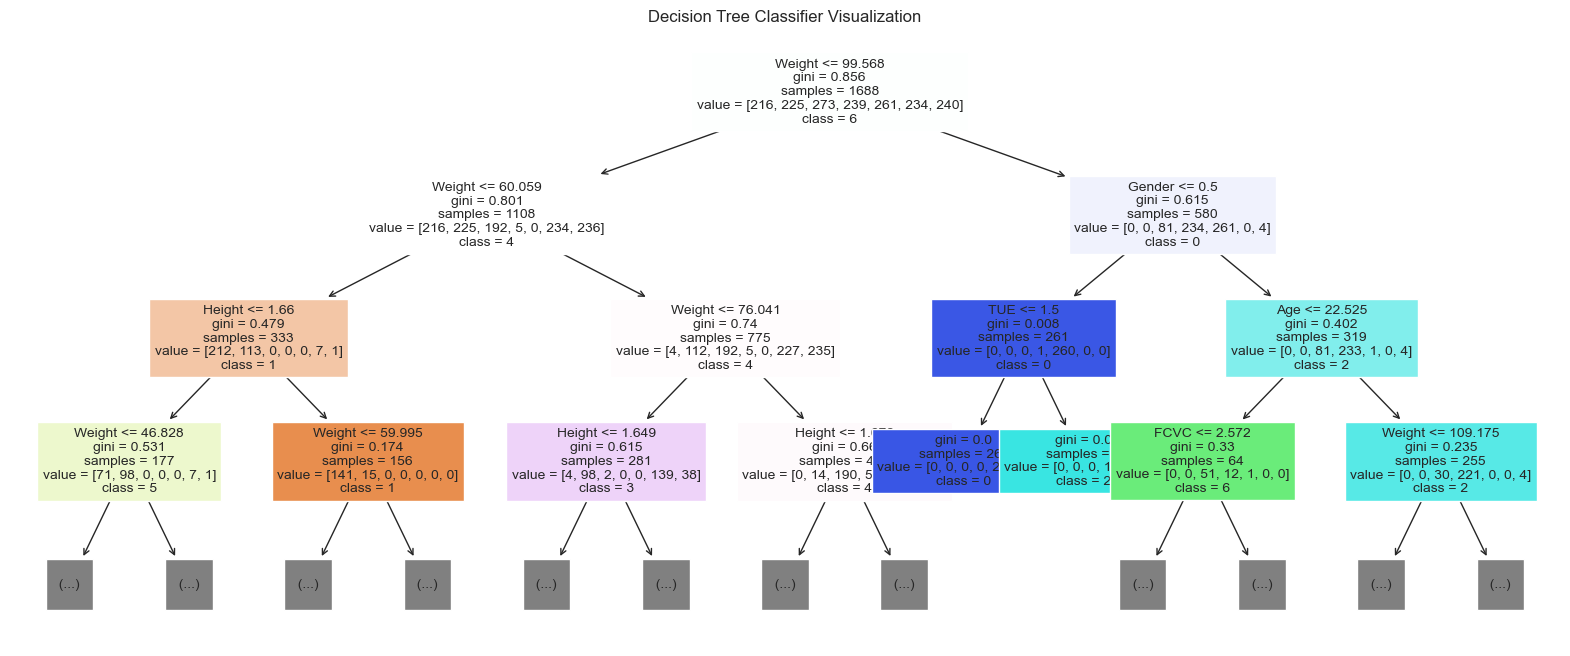

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Fit the model with tuned hyperparameters
best_dt_model = grid_dt.best_estimator_

# Plot the Decision Tree with a specified max_depth and more readable options
plt.figure(figsize=(20, 8))  # Adjust size for better readability
plot_tree(best_dt_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=y.unique().astype(str), 
          max_depth=3,
          fontsize=10)  # Adjust fontsize for clarity

plt.title("Decision Tree Classifier Visualization")
plt.show()


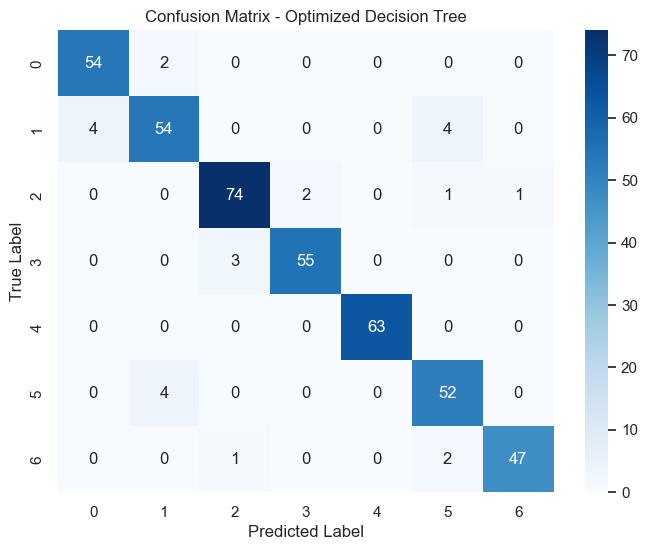

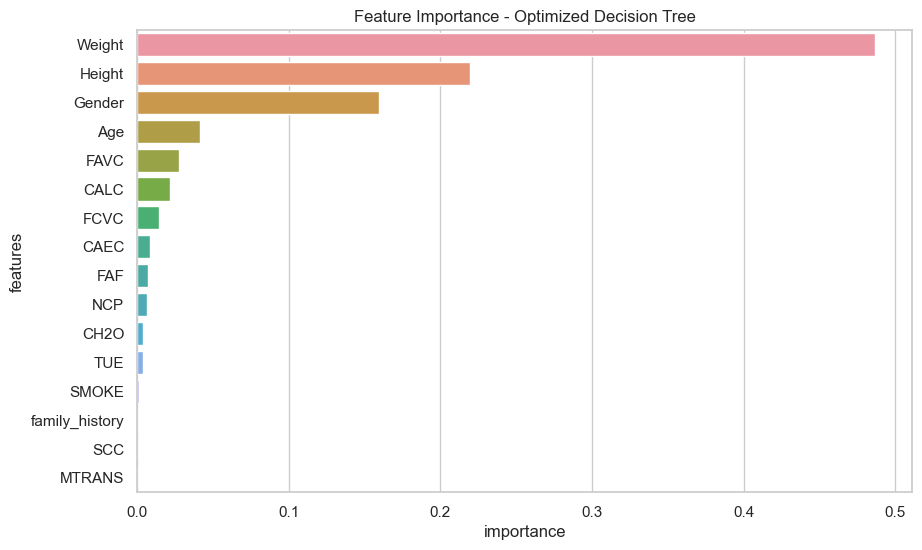

In [37]:
# Train the optimized Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importance Plot
importances_dt = pd.DataFrame({
    'features': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances_dt, x='importance', y='features')
plt.title('Feature Importance - Optimized Decision Tree')
plt.show()

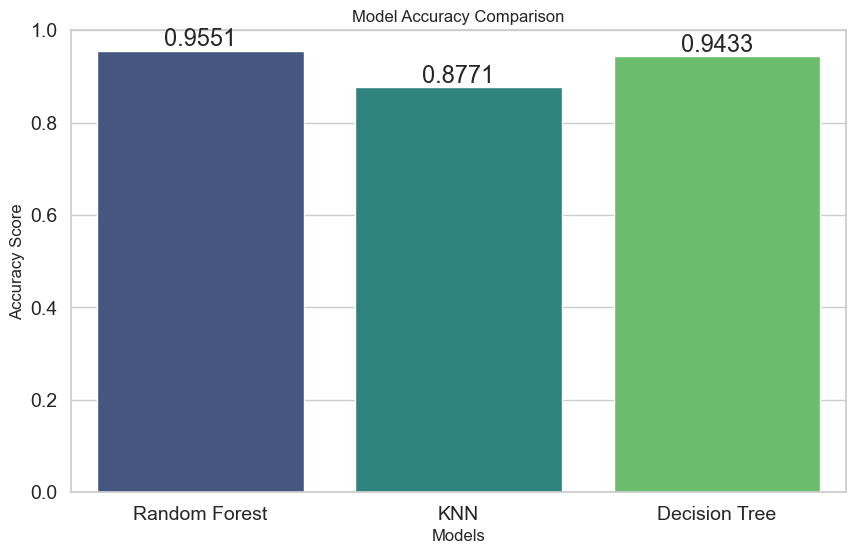

In [38]:
# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred_best)
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Store model names and their accuracies
model_names = ['Random Forest', 'KNN', 'Decision Tree']
accuracies = [rf_accuracy, knn_accuracy, dt_accuracy]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xlabel('Models')

# Annotate the bars with accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=17)
    
# Customize tick font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()